In [6]:
## datajohn

import glob
import pandas as pd

path  = '/Users/rubythurs/Documents/pilot data/'
json_files = glob.glob(path + '*.json')
combined_data =[]

for i, json_file in enumerate(json_files): 
    with open(json_file, 'r') as file:
        json_data = pd.read_json(json_file)
        combined_data.append(json_data)
        print(combined_data[i].shape)
print('\n','(trials, measures)')
print('number of files in "pilot data" folder: ', len(combined_data))
data = pd.concat(combined_data,ignore_index=True)
print('\n','total trials:',data.shape) 
data.head()

(134, 12)
(1285, 12)
(135, 12)
(945, 12)
(139, 12)
(1650, 12)
(16, 12)
(79, 12)
(134, 12)
(820, 12)
(101, 12)
(52, 12)
(134, 12)
(202, 12)
(255, 12)
(1216, 12)
(9, 12)

 (trials, measures)
number of files in "pilot data" folder:  17

 total trials: (7306, 12)


,trial,choice,isCorrect,touchTime,initTime,ratio,vel,camID,camShelfRadius,camNeck,targetsDistance,isParallelToViewCanvas
0,1,l,True,1.037743,3.423153,0.3,9,1,5.5,5.0,1.1,False
1,2,l,True,0.852116,4.967393,0.3,8,1,5.5,5.0,1.1,False
2,3,l,True,0.968222,6.325752,0.3,7,1,5.5,5.0,1.1,False
3,4,l,False,0.877764,7.809705,0.3,6,1,5.5,5.0,1.1,False
4,5,a,True,0.660697,9.208477,0.3,5,1,5.5,5.0,1.1,False


In [7]:
## parameter space

import numpy as np

title_ = data.columns[0:5].to_list()
title = data.columns.to_list()
control = [x for x in title if x not in title_]
print(control,'\n')

for i in control:
    print(i,': ',np.sort(data[i].unique()))

['ratio', 'vel', 'camID', 'camShelfRadius', 'camNeck', 'targetsDistance', 'isParallelToViewCanvas'] 

ratio :  [0.1 0.2 0.3]
vel :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
camID :  [1 2 3]
camShelfRadius :  [5.5 8. ]
camNeck :  [0.  2.  3.5 5. ]
targetsDistance :  [1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8]
isParallelToViewCanvas :  [False  True]


max counts: 12


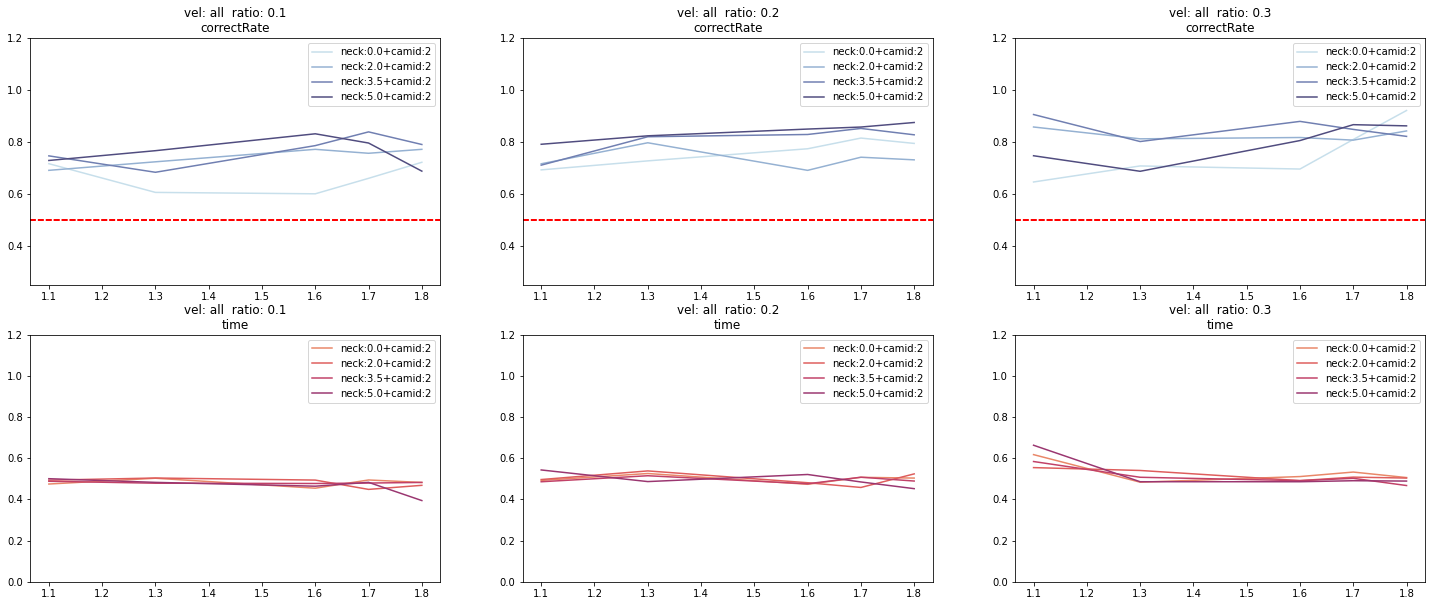

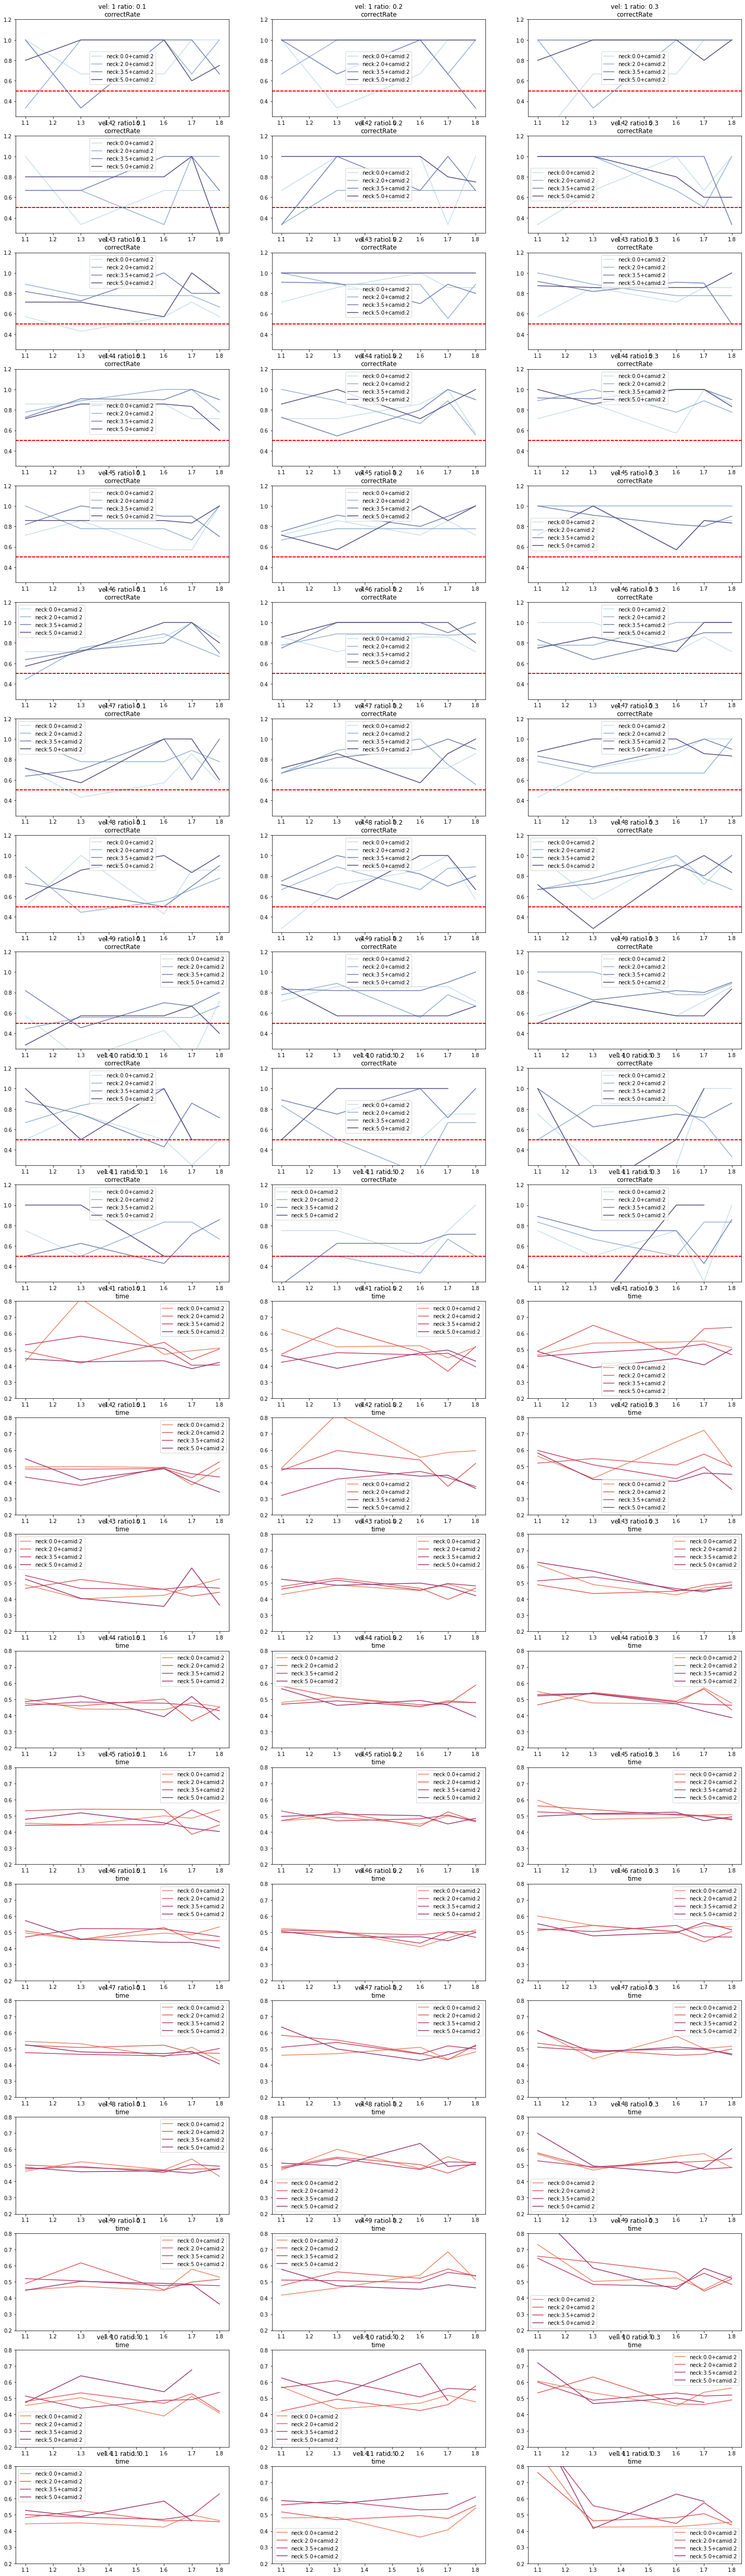

In [11]:
## make groups for future analysis called 'grouped_data'
grouped = data.drop(columns=['trial','initTime']).groupby(control)
grouped_data = pd.merge(grouped.mean().reset_index(),grouped.size().reset_index(name='counts'))
grouped_data.rename(columns={'touchTime':'mean_touchTime','isCorrect':'correctRate'},inplace=True)
print('max counts: '+str(grouped_data['counts'].max()))
gata = grouped_data.loc[(grouped_data['counts'] >= 2) & 
                    (grouped_data['camShelfRadius'] ==5.5) & 
                    (grouped_data['isParallelToViewCanvas'] == True)
                    ] #控制变量


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("ch:s=.25,rot=-.25", 5)
linestyle = ['solid','dashed','dotted']
colort=sns.color_palette("flare",5)


##### average vel 
gataa = gata.groupby(['targetsDistance','camID','camNeck','ratio']).mean().reset_index()
camid=gataa['camID'].unique()
camneck = gataa['camNeck'].unique()
listofratio=gataa['ratio'].unique() 
figa,axsa = plt.subplots(2,3, figsize=(25, 10))

for a,ao in enumerate(listofratio):
    gataa_axs= gataa.loc[gataa['ratio']==ao]
    for n, neck in enumerate(camneck):
        for i,id in enumerate(camid): 
            gataa_toplt=gataa_axs.loc[(gataa_axs['camID']==id) &
                    (gataa_axs['camNeck']==neck)]
            axsa[0,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['correctRate'],label=f"neck:{neck}+camid:{id}",color = color[n],linestyle = linestyle[i])
            axsa[0,a].set_ylim(0.25, 1.2)
            axsa[0,a].axhline(y=0.5, color='red',linestyle = 'dashed')
            axsa[0,a].legend()
            axsa[0,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'correctRate')
            
            axsa[1,a].plot(gataa_toplt['targetsDistance'],gataa_toplt['mean_touchTime'],label=f"neck:{neck}+camid:{id}",color = colort[n],linestyle = linestyle[i])
            axsa[1,a].set_ylim(0, 1.2)
            axsa[1,a].legend()
            axsa[1,a].set_title('vel: all '+' ratio: '+str(round(ao,1))+'\n'+'time')


##### vel every
camid=gata['camID'].unique()
camneck = gata['camNeck'].unique()
vel = gata['vel'].unique()
listofratio = gata['ratio'].unique()

fig,axs = plt.subplots(len(vel)*2,3, figsize=(25, 90))
for v,velocity in enumerate(vel):
    for r, ratio in enumerate(listofratio):
        gata_toplt= gata.loc[(gata['vel']==velocity)&
                        (gata['ratio']==ratio)]

        for n, neck in enumerate(camneck):
            for i,id in enumerate(camid):
                view_group= gata_toplt.loc[(gata['camID']==id) &
                    (gata['camNeck']==neck)]
                axs[v,r].plot(view_group['targetsDistance'],view_group['correctRate'],label=f"neck:{neck}+camid:{id}",
                              color = color[n],linestyle = linestyle[i])
                axs[v,r].set_ylim(0.25, 1.2)
                axs[v,r].axhline(y=0.5, color='red',linestyle = 'dashed')
                axs[v,r].legend()
                axs[v,r].set_title('vel: '+str(velocity)+' ratio: '+str(round(ratio,1))+'\n'+'correctRate')

                axs[v+len(vel),r].plot(view_group['targetsDistance'],view_group['mean_touchTime'],label=f"neck:{neck}+camid:{id}",
                              color = colort[n],linestyle = linestyle[i])
                axs[v+len(vel),r].set_ylim(0.2, 0.8)
                axs[v+len(vel),r].legend()
                axs[v+len(vel),r].set_title('vel: '+str(velocity)+' ratio: '+str(round(ratio,1))+'\n'+'time')  



厘米的猜想：
理论假设：视角影响原始记忆，运动时间影响素材，轨迹曲线增加几何复杂性，
  从视角的作用可以辅助理解判断所用的几何逻辑， 对比直线运动，回答是不是简单的三角结构作为直觉，


1、camId2， neck 高，yu会变难；camid3 也是这样；camid1 也是；但是不知道是因为空间信息变多还是因为主人感更强的原因；
    一列4个速度组， 两个平抛两个上斜抛，横坐标是 tardistance，一行是 ratio固定三个值, as in gata; session循环
4、camid影响不明， 从第一条结果对比实线虚线；‘
2、ratio 一定有影响 ， 正确率降到五十分的 ratio阈值随视角对应关系可以列表，呼应第一条； 此时平抛定速上抛定速各一个，tardis 定最小；new session
3、往上飞的让人惊讶 有点反直觉的感觉；横速度一样，竖速度不一样，上抛不同角度，找三个视角， 对比 ratio 阈值；

5、其他星球运动观感不明；kinemetic 找 ratio 阈值；
6、加上出生炮台影响不明；对比#2条;
7、烟雾和羽毛质感的非刚体运动观感不明；液体不明；


max counts: 12
5.0
ratio:  0.1  tardistance:  [1.1 1.3 1.6] 

ratio:  0.2  tardistance:  [1.1 1.3 1.6 1.7] 

ratio:  0.3  tardistance:  [1.1 1.3 1.6 1.7] 

0.0
ratio:  0.1  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.2  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.3  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

2.0
ratio:  0.1  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.2  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.3  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

3.5
ratio:  0.1  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.2  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

ratio:  0.3  tardistance:  [1.1 1.3 1.6 1.7 1.8] 

5.0
ratio:  0.1  vel:  [3 4 5 6 7 8 9] 

ratio:  0.2  vel:  [3 4 5 6 7 8 9] 

ratio:  0.3  vel:  [3 4 5 6 7 8 9] 

0.0
ratio:  0.1  vel:  [3 4 5 6 7 8 9] 

ratio:  0.2  vel:  [3 4 5 6 7 8 9] 

ratio:  0.3  vel:  [3 4 5 6 7 8 9] 

2.0
ratio:  0.1  vel:  [3 4 5 6 7 8 9] 

ratio:  0.2  vel:  [3 4 5 6 7 8 9] 

ratio:  0.3  vel:  [3 4 5 6 7 8 9] 

3.5
ratio:  0.1  vel:  [ 3  

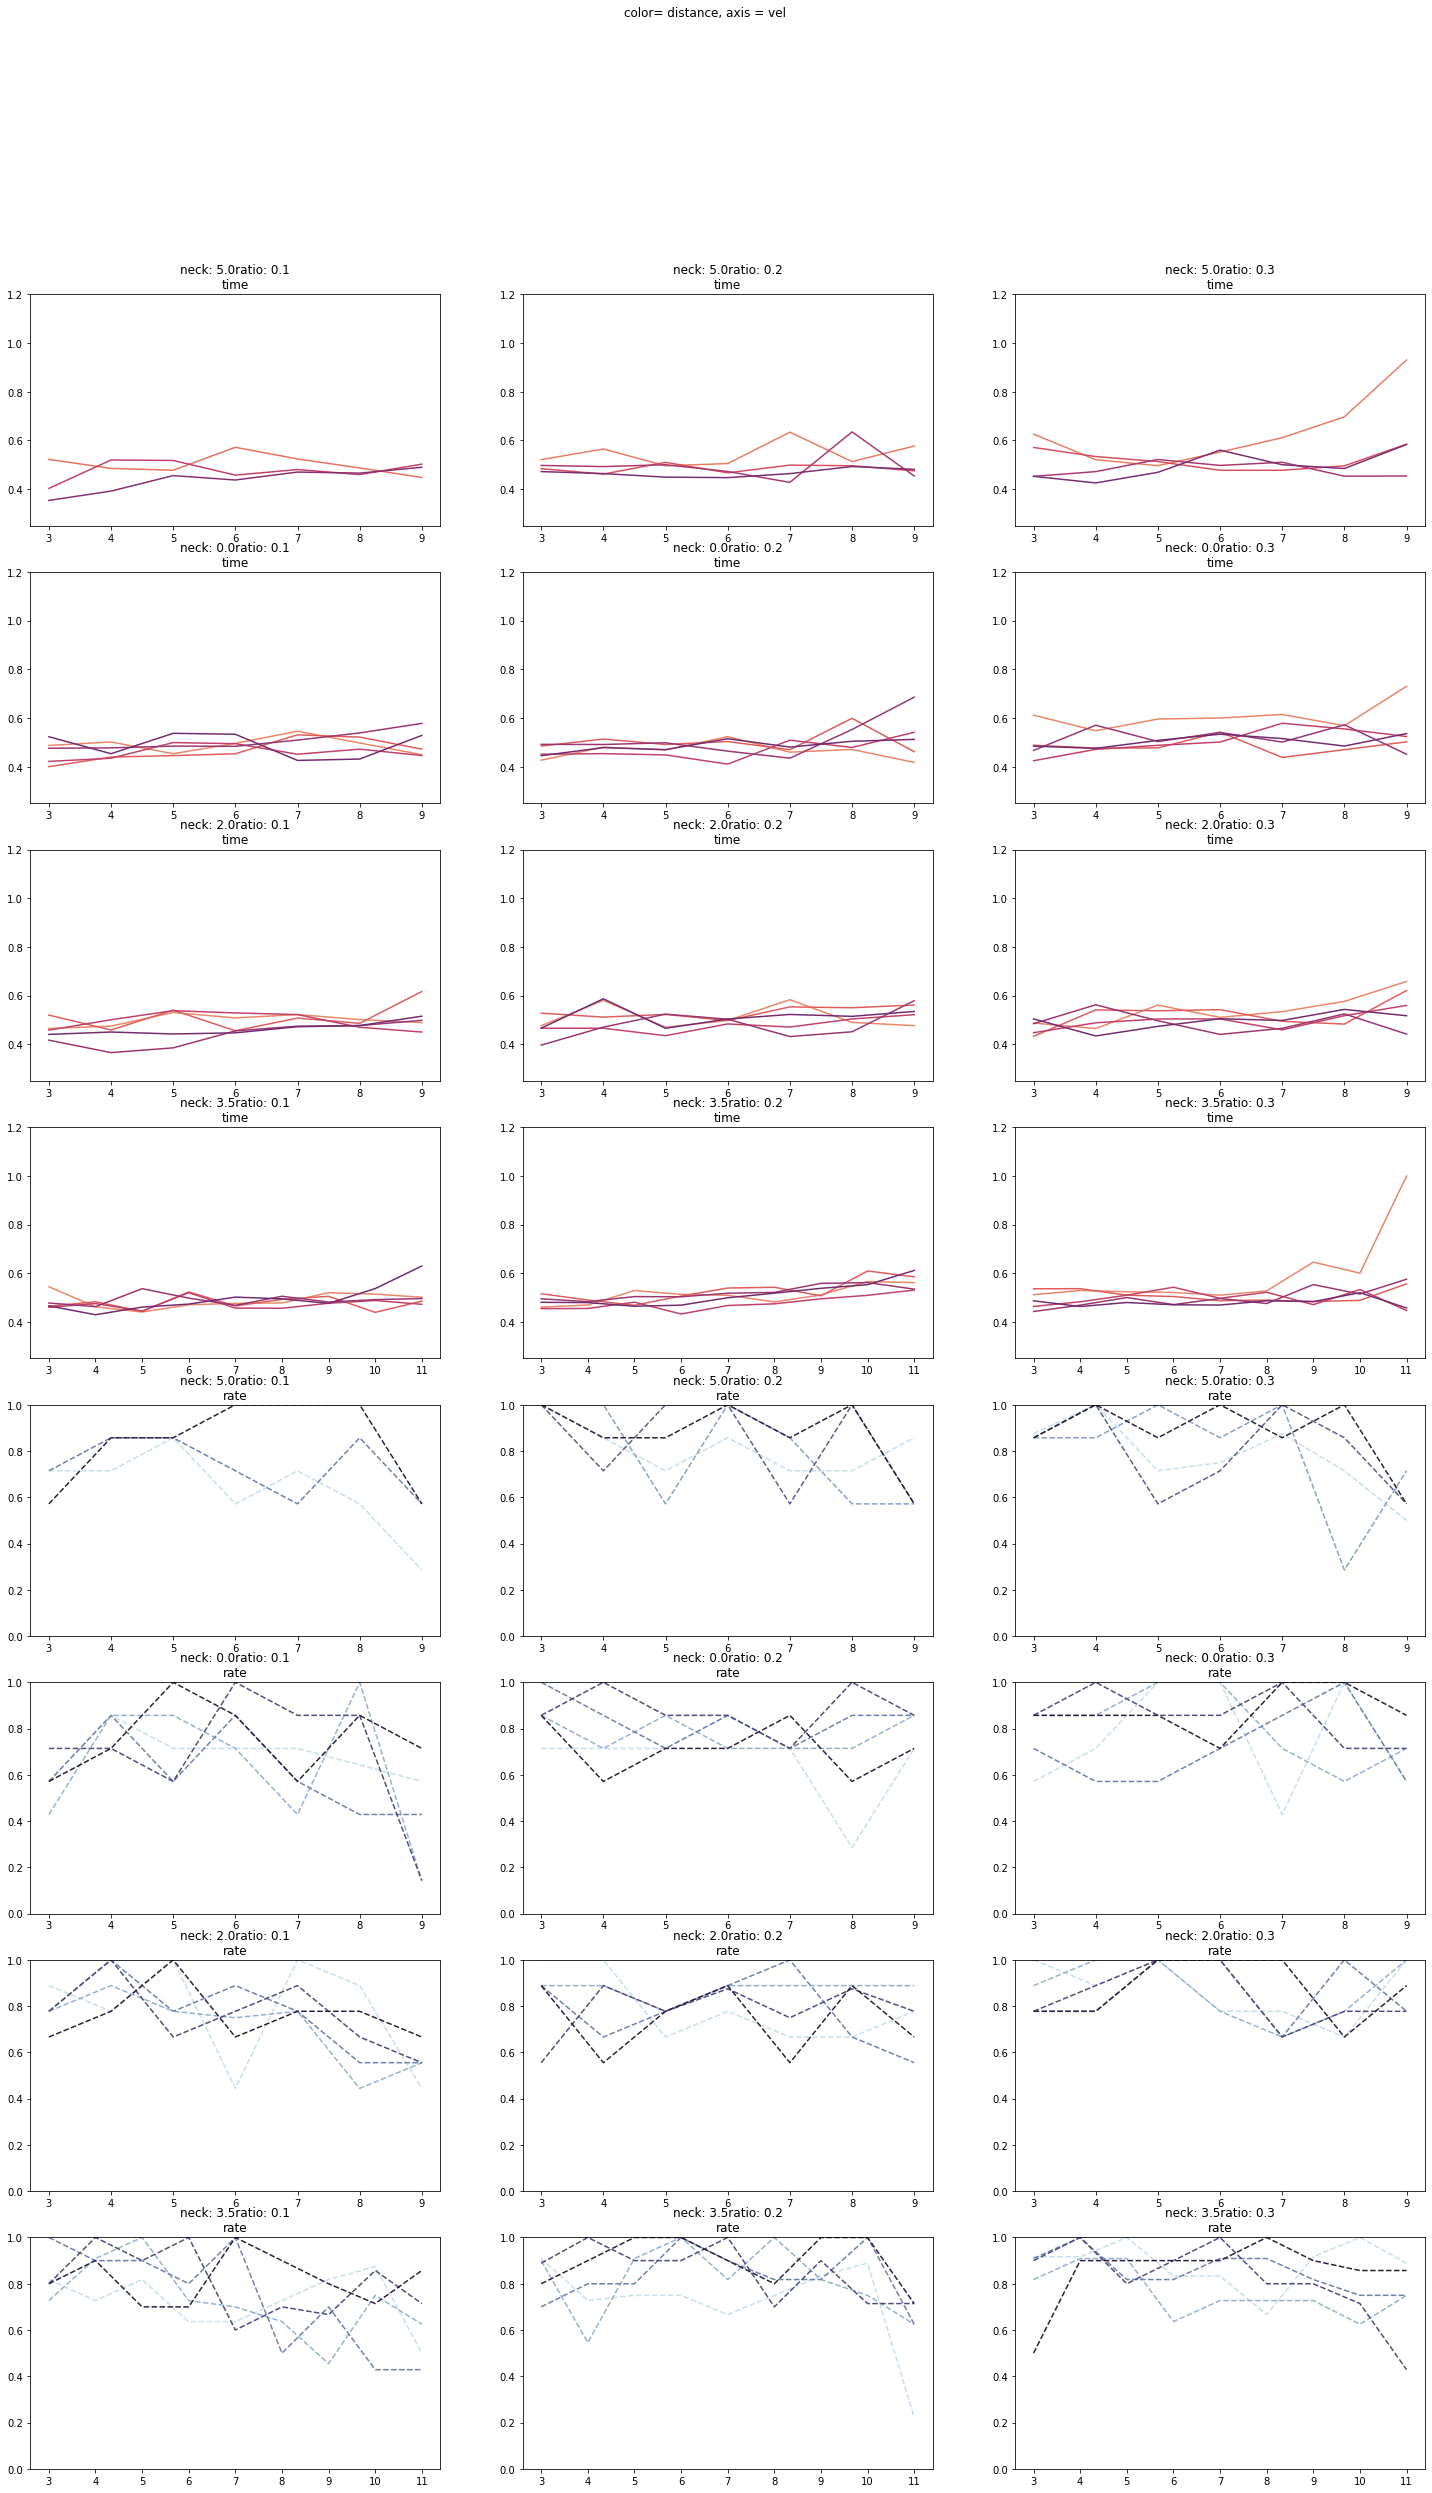

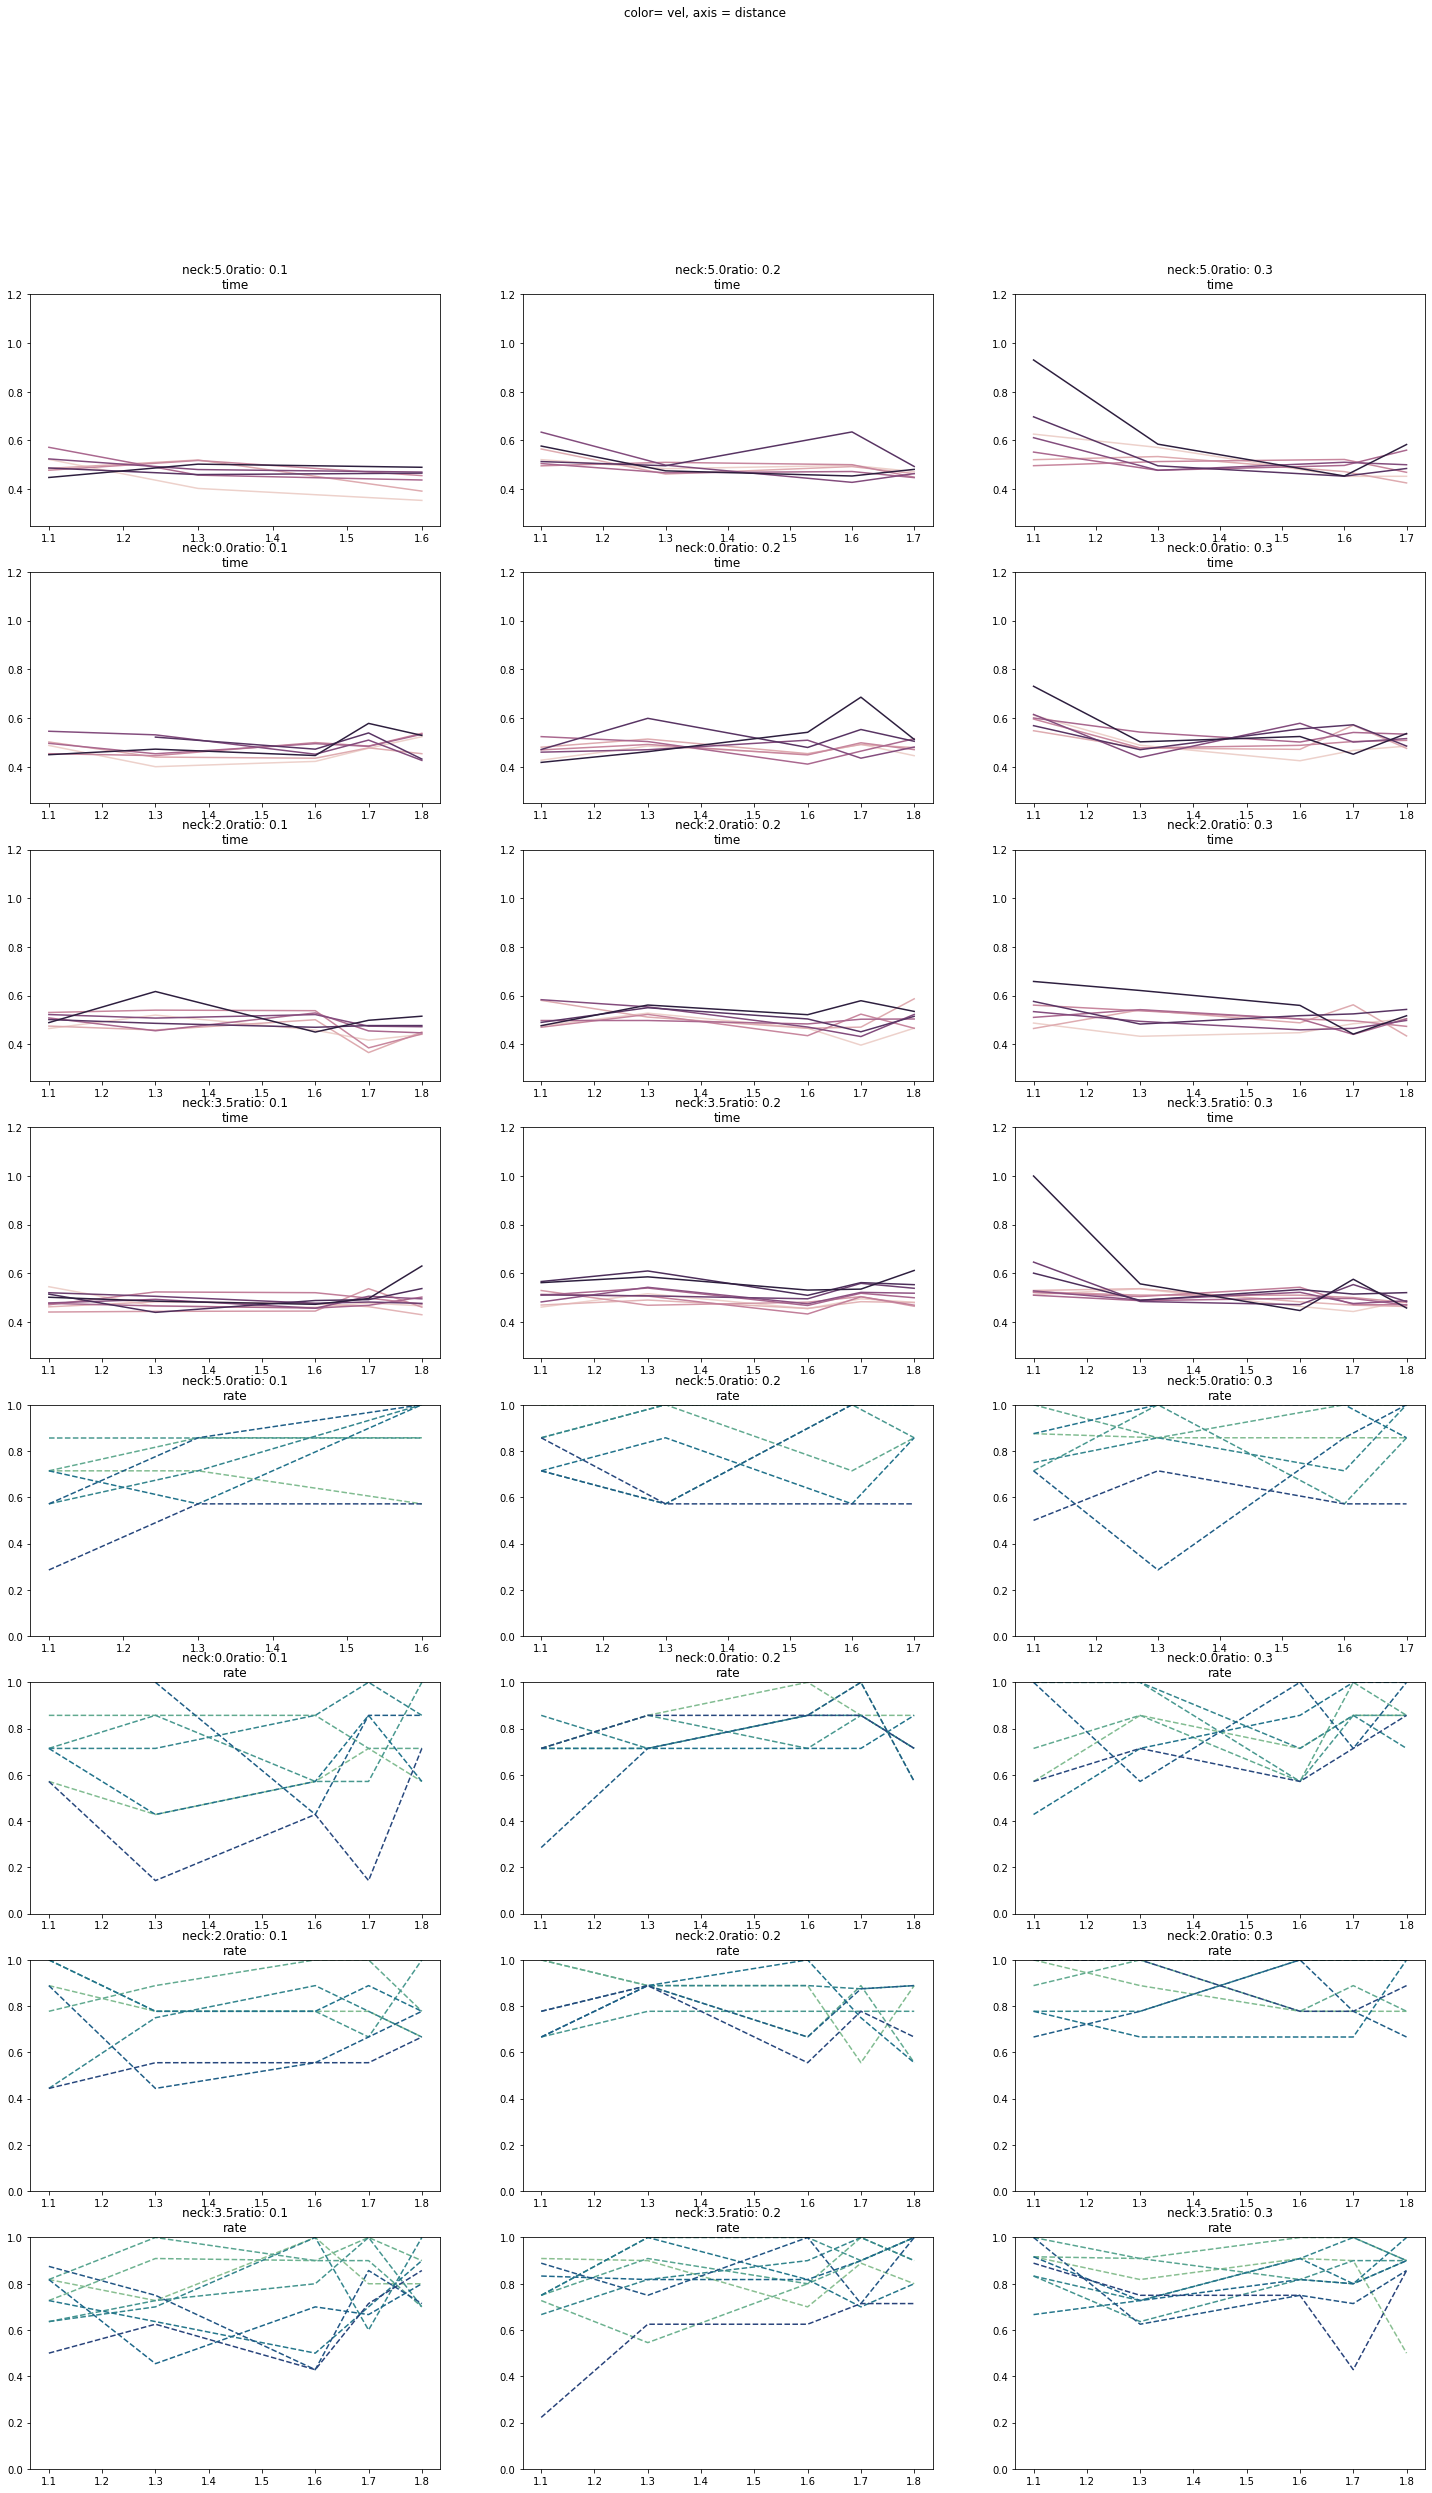

In [91]:
## make groups for future analysis called 'grouped_data'
grouped = data.drop(columns=['trial','initTime']).groupby(control)
grouped_data = pd.merge(grouped.mean().reset_index(),grouped.size().reset_index(name='counts'))
grouped_data.rename(columns={'touchTime':'mean_touchTime','isCorrect':'correctRate'},inplace=True)
print('max counts: '+str(grouped_data['counts'].max()))

fata = grouped_data.loc[(grouped_data['counts'] >= 7) & 
                    (grouped_data['camID'] == 2) & 
                    (grouped_data['isParallelToViewCanvas'] == True)
                    ] #控制变量


## color= distance, axis = vel################################################
import matplotlib.pyplot as plt
import seaborn as sns

listofneck = grouped_data['camNeck'].unique()
fig,axs = plt.subplots(8,3, figsize=(25, 40))
fig.suptitle('color= distance, axis = vel')

for k,kiwi in enumerate(listofneck):
    print(kiwi)
    listofratio = grouped_data['ratio'].unique()

    for j,jam in enumerate(listofratio):
        tar_group = fata.loc[(grouped_data['ratio'] == jam)  & 
                            (grouped_data['camNeck'] == kiwi) 
                            ]
        tar = tar_group['targetsDistance'].unique()
        print('ratio: ',round(jam,1),' tardistance: ',tar,'\n')
        colorsfortime = sns.color_palette("flare",len(tar))
        #legend = plt.plot(range(3),range(3),color = colors[])
        colorsforrate = sns.color_palette("ch:s=.25,rot=-.25", len(tar))
        john2=[]

        for i ,item in enumerate(tar):
            data_toplt = tar_group.loc[(grouped_data['targetsDistance'] == item)]
            john2.append(data_toplt)
            axs[k,j].plot(john2[i]['vel'],john2[i]['mean_touchTime'],color = colorsfortime[i])
            axs[k,j].set_ylim(0.25, 1.2)
            axs[k+4,j].plot(john2[i]['vel'],john2[i]['correctRate'],color = colorsforrate[i],linestyle='dashed')
            axs[4+k,j].set_ylim(0, 1)
        axs[k,j].set_title('neck: '+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'time')
        axs[k+4,j].set_title('neck: '+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'rate')


## color= vel, axis = distance'#########################################

import matplotlib.pyplot as plt
import seaborn as sns

listofneck = grouped_data['camNeck'].unique()

fig,axs = plt.subplots(8,3, figsize=(25, 40))
fig.suptitle('color= vel, axis = distance')

for k,kiwi in enumerate(listofneck):
    print(kiwi)
    listofratio = grouped_data['ratio'].unique()
    for j,jam in enumerate(listofratio):
        vel_group = fata.loc[(grouped_data['ratio'] == jam)  &
                            (grouped_data['camNeck'] == kiwi) 
                             ]
        vel = vel_group['vel'].unique()
        print('ratio: ',round(jam,1)
        ,' vel: ',vel,'\n')

        colorsfortime = sns.cubehelix_palette(len(vel))
        #legend = plt.plot(range(3),range(3),color = colors[])
        colorsforrate = sns.color_palette("crest", len(vel))

        john=[]
        for i ,item in enumerate(vel):
            data_toplt = vel_group.loc[(grouped_data['vel'] == item)]
            john.append(data_toplt)
            axs[k,j].plot(john[i]['targetsDistance'],john[i]['mean_touchTime'],color=colorsfortime[i])
            axs[k,j].set_ylim(0.25, 1.2)
            axs[4+k,j].plot(john[i]['targetsDistance'],john[i]['correctRate'],linestyle='dashed',color = colorsforrate[i])
            axs[4+k,j].set_ylim(0, 1)
        axs[k,j].set_title('neck:'+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'time')
        axs[4+k,j].set_title('neck:'+str(kiwi)+'ratio: '+str(round(jam,1))+'\n'+'rate')
